In [1]:
import nbsetup
import numpy as np
import seaborn as sns
import scipy as sp
import pandas as pd

In [2]:
from models.load import load_sparc
from models.sparc.result import Result
from models.sparc.mcmc import mcmc
from models.sparc.analysis import Analysis
from models.sparc.profile import quality_profiles

In [44]:
many = Result(load_sparc('sparc_smog_401_1'))
few = Result(load_sparc('sparc_smog_201_1'))

In [48]:
flat = few

In [49]:
aa = Analysis(mcmc(flat.datasets()['Quality data'], tight={'Inc': 2, 'D': 4, 'Ymass': 10}), name='SMOG')
flat = aa.Result(simulations=flat.simulations, fast=True)

[('Everything', 0.004155008345372473, 0.1432618594056161),
 ('Quality data', 0.0036980717378819355, 0.14203082458688648),
 ('Quality simulation', 0.014951041726080805, 0.10139757544043568)]

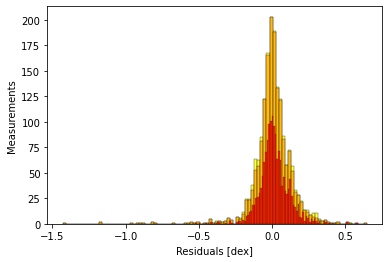

In [50]:
[(k, o[1].mean(), o[1].std()) for k, o in flat.residual_hists().items()]

[('Everything', 0.014656772710463704, 0.13116000775043685),
 ('Quality data', 0.013821329508547428, 0.13044938800622463),
 ('Quality simulation', 0.017766674796541204, 0.10302611804137275)]

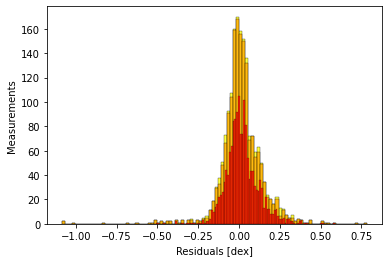

In [47]:
[(k, o[1].mean(), o[1].std()) for k, o in flat.residual_hists().items()]

[('Everything', -0.037653476842476524, 0.13968881207674055),
 ('Quality data', -0.037653476842476524, 0.13968881207674055),
 ('Quality simulation', -0.034940227465010784, 0.11417705435794925)]

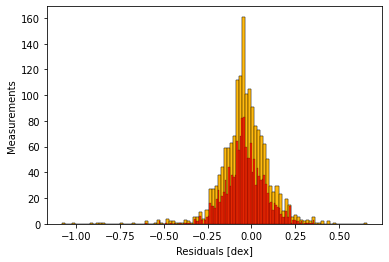

In [43]:
[(k, o[1].mean(), o[1].std()) for k, o in many.residual_hists().items()]

<AxesSubplot:xlabel='Galaxy in order of SPARC reference parameter value', ylabel='Mass/Luminosity adjustment'>

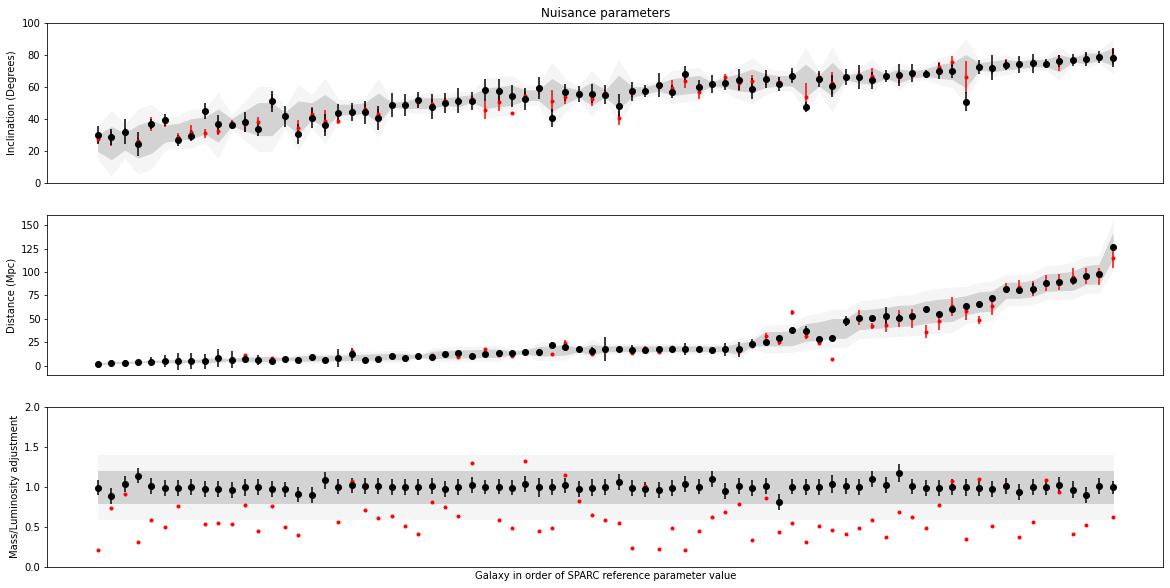

In [31]:
aa.plot_nuissance()

In [114]:
#aa = Analysis(mcmc(proj.datasets()['Quality simulation'], tight={'Inc': 2, 'D': 4, 'Ymass': 20}), name='Experiment')
#proj = aa.Result(simulations=proj.simulations, fast=True)

[('Everything', -0.0008545910047459374, 0.1484703252052777),
 ('Quality data', -0.0008545910047459374, 0.1484703252052777),
 ('Quality simulation', 0.00631641166837142, 0.09296245451525573)]

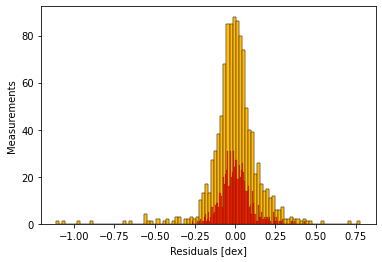

In [13]:
[(k, o[1].mean(), o[1].std()) for k, o in flat.residual_hists().items()]

In [79]:
all_simulations = load_sparc('sparc_smog_201_11')

In [80]:
simulations = {}
for k, s in all_simulations.items():
    if s.profile.sparc_dict['Q'] < 3:
        simulations[k] = s

In [81]:
raw = Result(simulations)

<AxesSubplot:title={'center':'Quality simulation'}, xlabel='Log of Baryonic g', ylabel='Log of Observed g'>

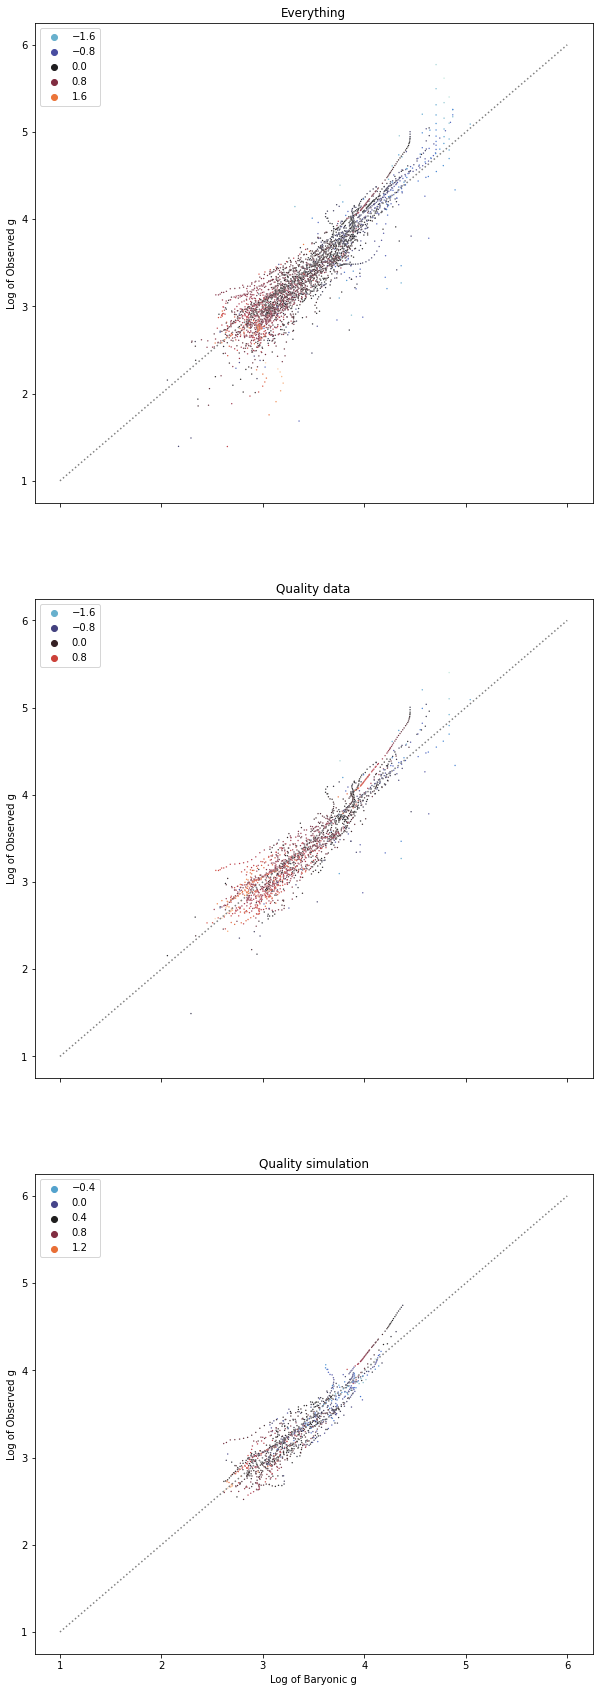

In [82]:
raw.plot_rar()

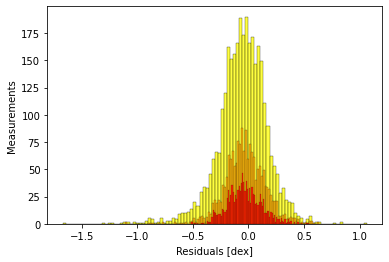

In [83]:
outs = raw.residual_hists()

In [84]:
aa = Analysis(mcmc(raw.datasets()['Quality simulation'], tight={'Inc': 2, 'D': 4, 'Ymass': 20}), name='Experiment')
tuned = aa.Result(simulations=simulations, fast=True)

In [95]:
tuned.queries_strs['Quality simulation'] = 'Q<2 & Inc<80 & Inc>20 & rel_R>0.05'

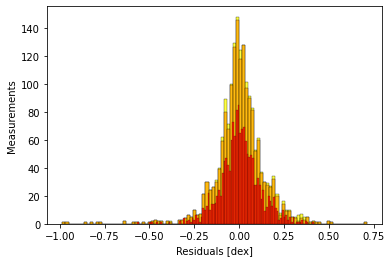

In [96]:
outs = tuned.residual_hists()

In [97]:
for k, o in outs.items():
    print(k, o[1].mean(), o[1].std())

Everything 0.0059648983919464785 0.13892683093619043
Quality data 0.0034367638954269355 0.13719374650038024
Quality simulation 0.006177009546307829 0.11129525086605355


<AxesSubplot:title={'center':'Quality simulation'}, xlabel='Log of Baryonic g', ylabel='Log of Observed g'>

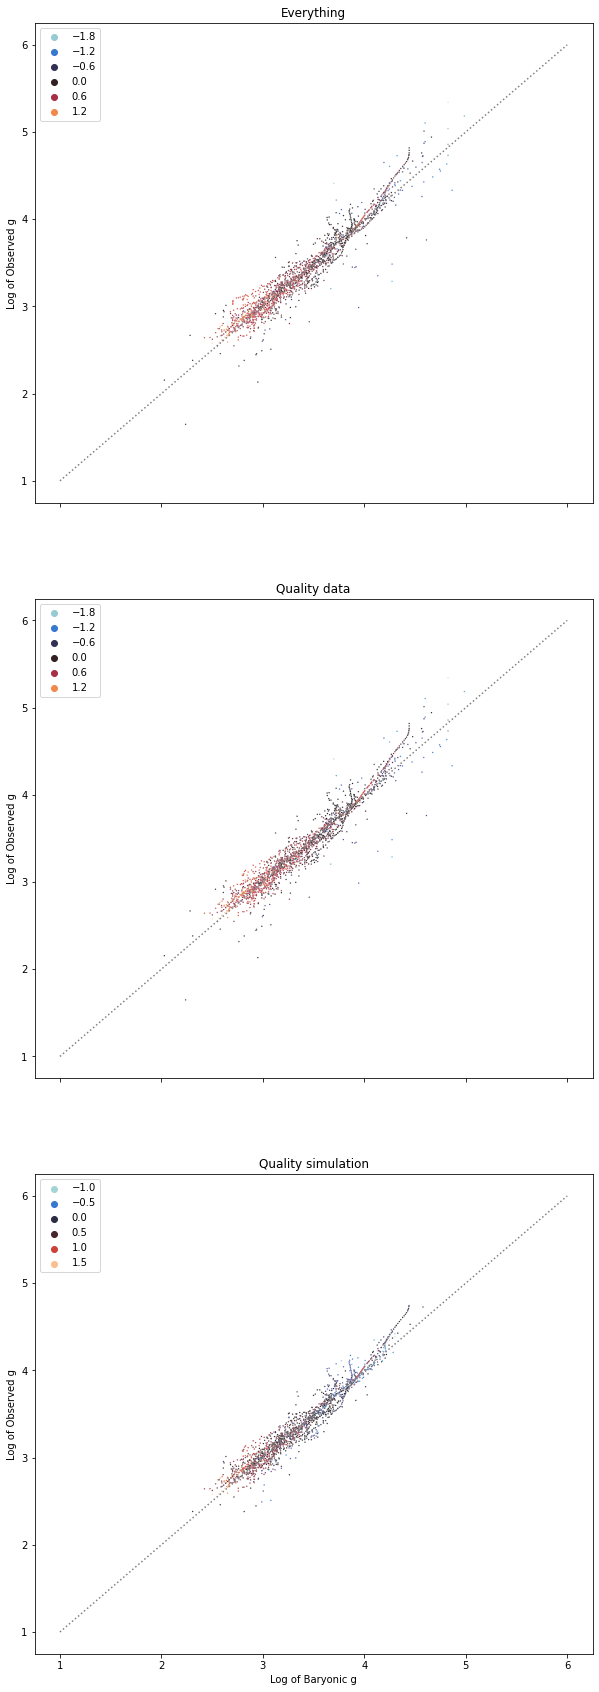

In [98]:
tuned.plot_rar()

<AxesSubplot:xlabel='Galaxy in order of SPARC reference parameter value', ylabel='Mass/Luminosity adjustment'>

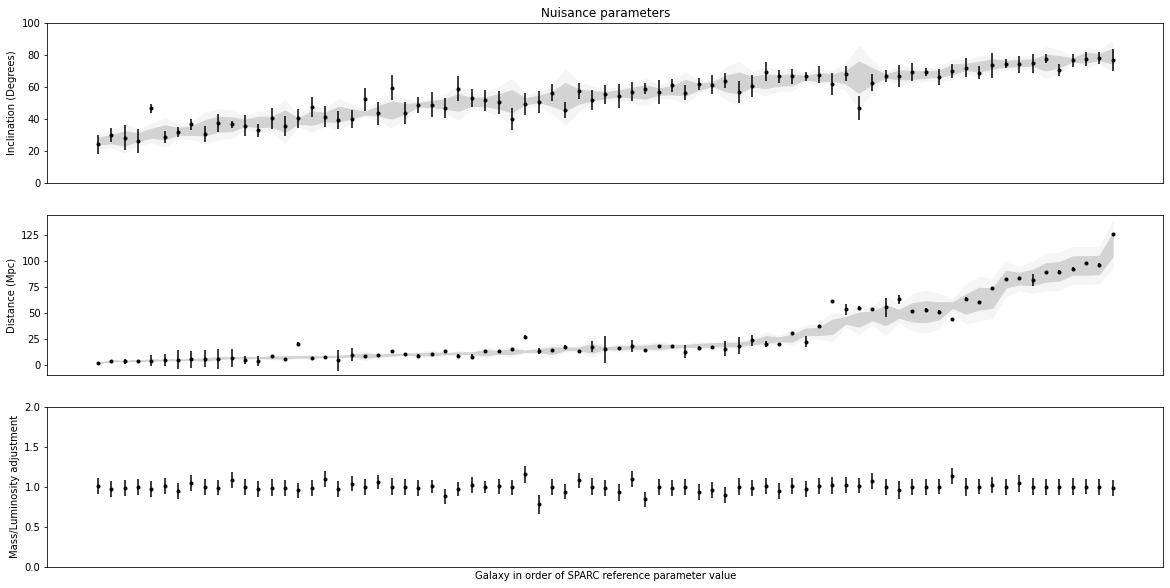

In [118]:
aa.plot_nuissance(source='RAR')

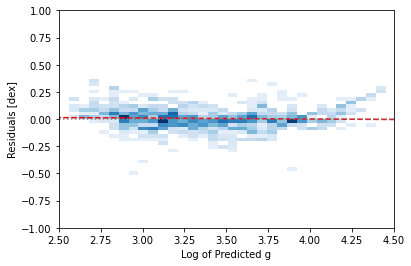

In [68]:
g = tuned.residual(xlim=(2.5,4.5), ylim=(-1,1), xlabel="Log of Predicted g")

In [94]:
aa.uni

{'gamma': array(1.48766782)}

In [79]:
outputs.residual(plot=False).slope

-0.030922542627355627

In [99]:
outputs

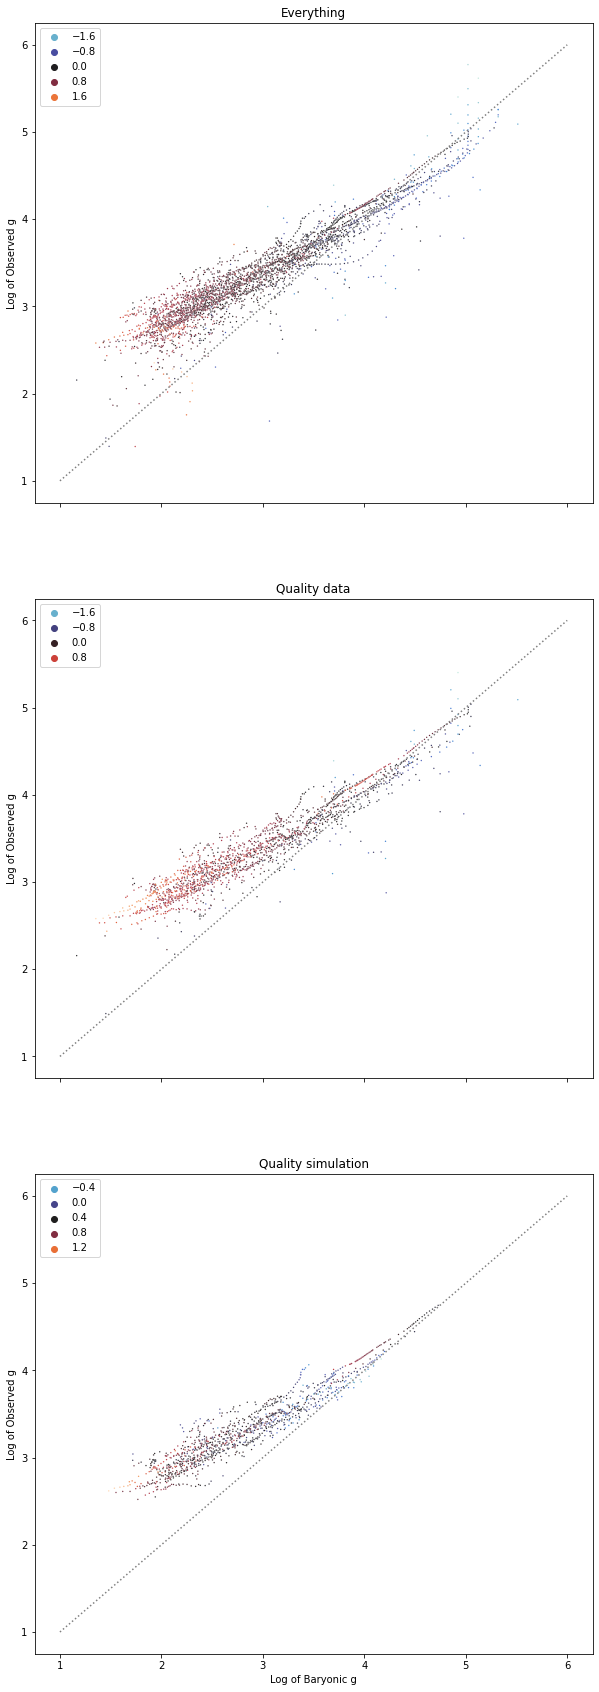

In [56]:
standard = Result(load_sparc('sparc_standard_201_1')).plot_rar()

In [53]:
standard = Result(load_sparc('sparc_standard_201_1'), adjustments=tuned.adjustments)

<AxesSubplot:title={'center':'Quality simulation'}, xlabel='Log of Baryonic g', ylabel='Log of Observed g'>

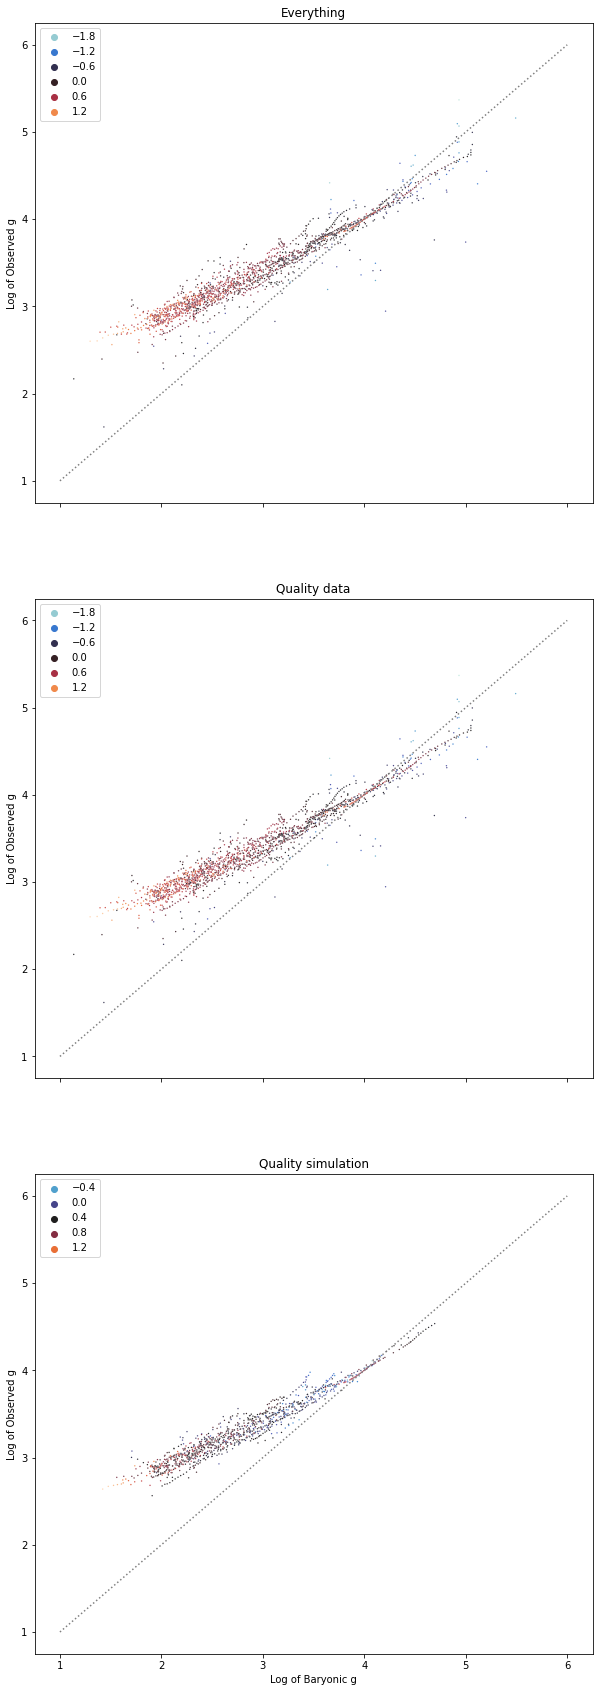

In [54]:
standard.plot_rar()

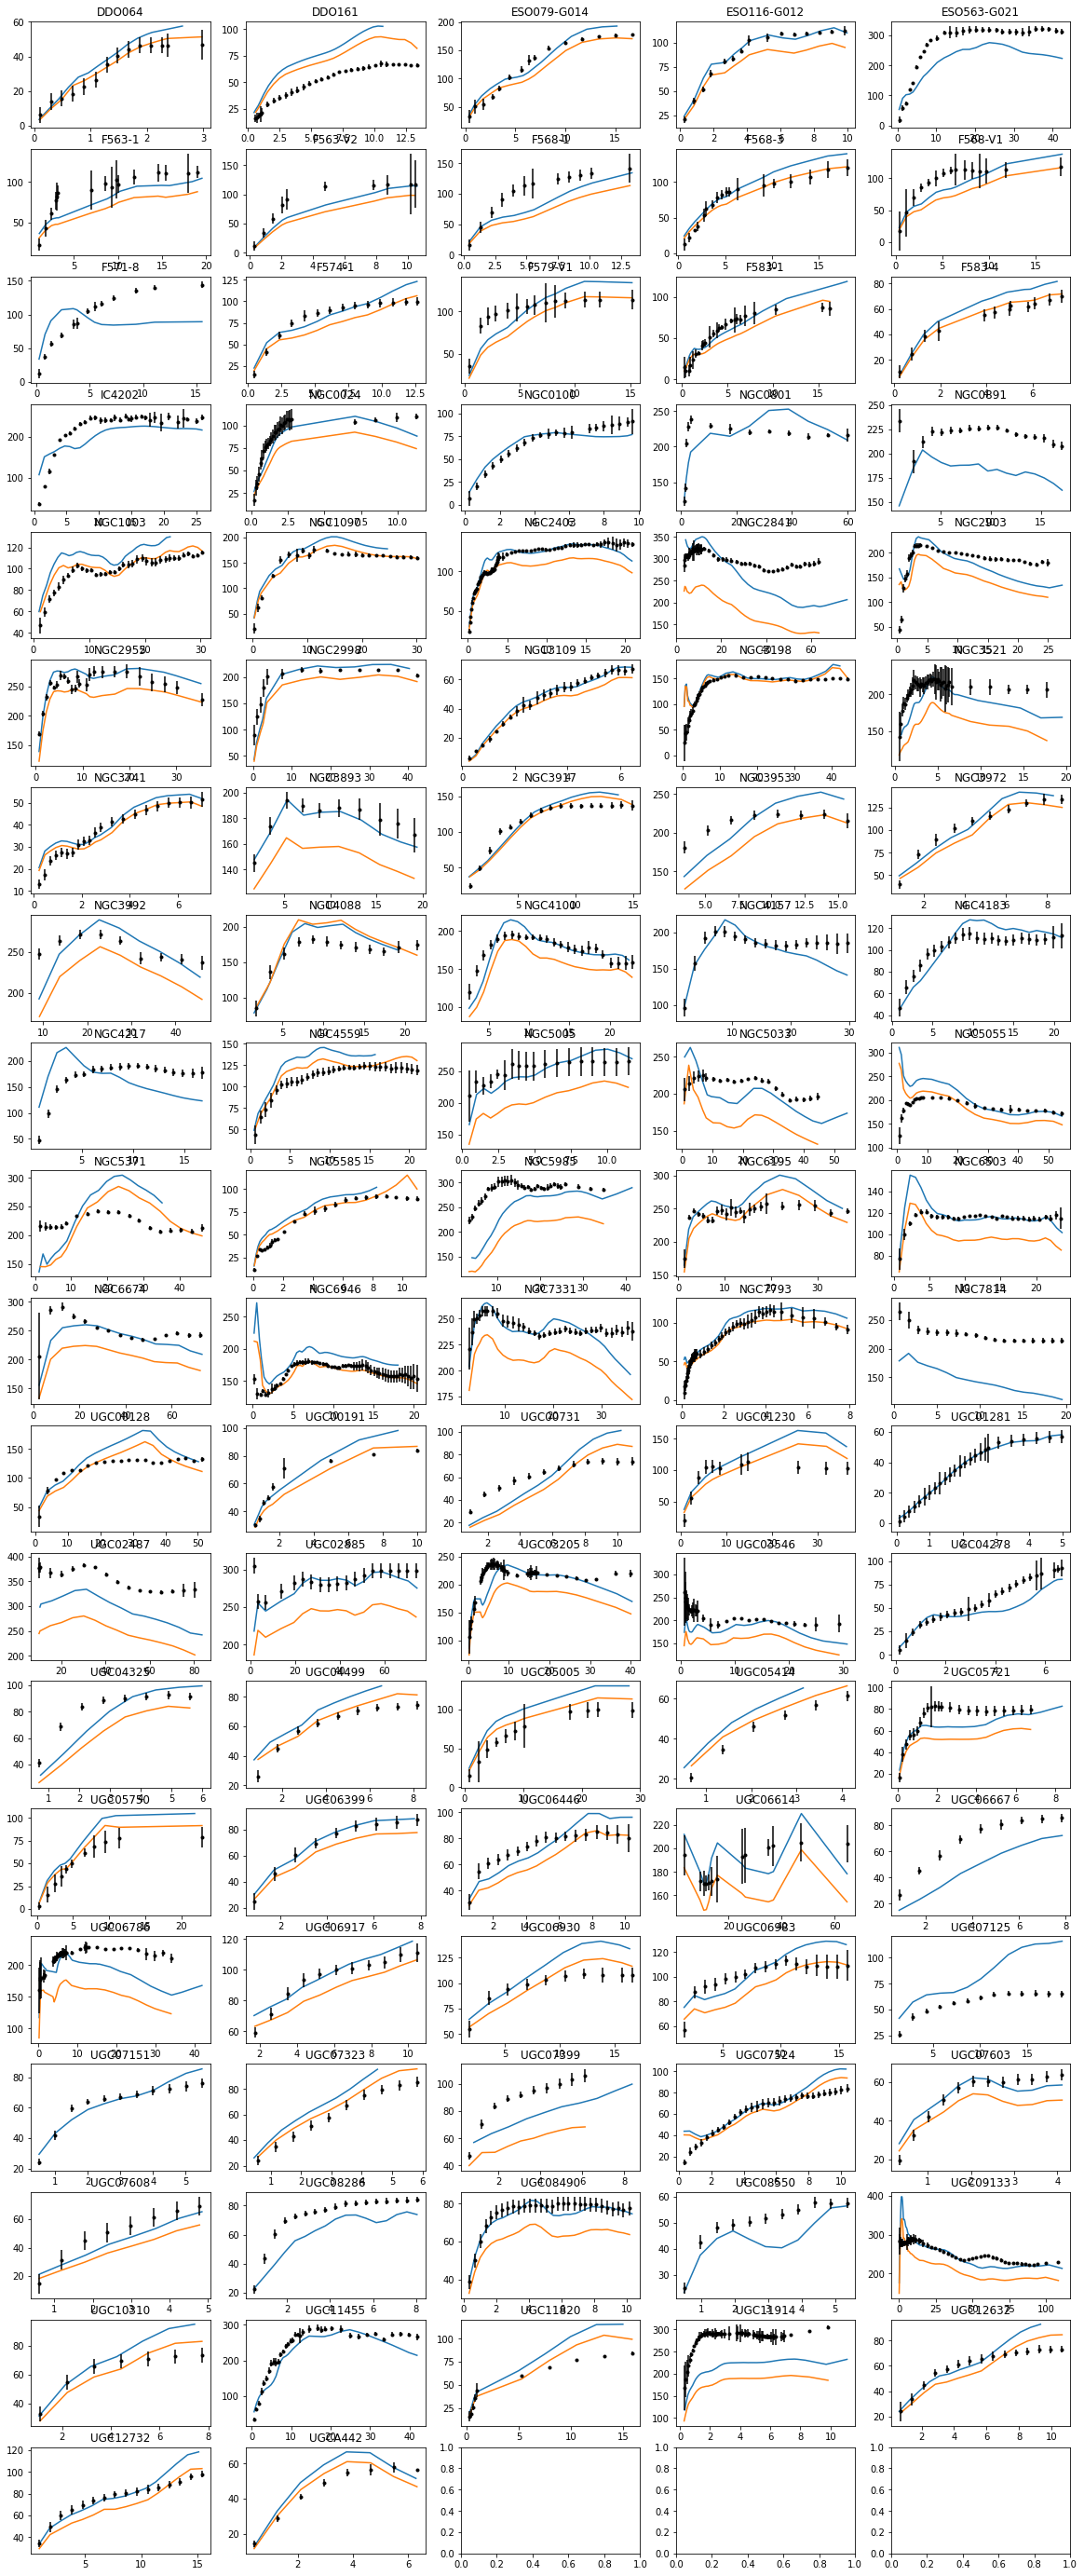

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_velocities(smog, reference, cols=5):    
    groups = smog.dataframe.query('Q == 1').groupby('Galaxy')
    fig, axes = plt.subplots((len(groups)//cols)+1, cols, figsize=(20,50))
    
    i = 0
    for galaxy, df in groups:
        ax = axes[i//cols][i%cols]
        # baryonic
        sdf = reference.dataframe.query('Galaxy=="%s"' % galaxy)
        g = sns.lineplot(x=sdf['R'], y=sdf['Sbar'], ax=ax)
        # smog
        g = sns.lineplot(x=df['R'], y=df['Sbar'], ax=ax)
        # observations
        g.errorbar(df['R'], df['Vobs'], yerr=df['e_Vobs'], fmt='.k')
        # labels
        g.set(title=galaxy, xlabel=None, ylabel=None)
        i += 1

plot_velocities(raw, tuned)

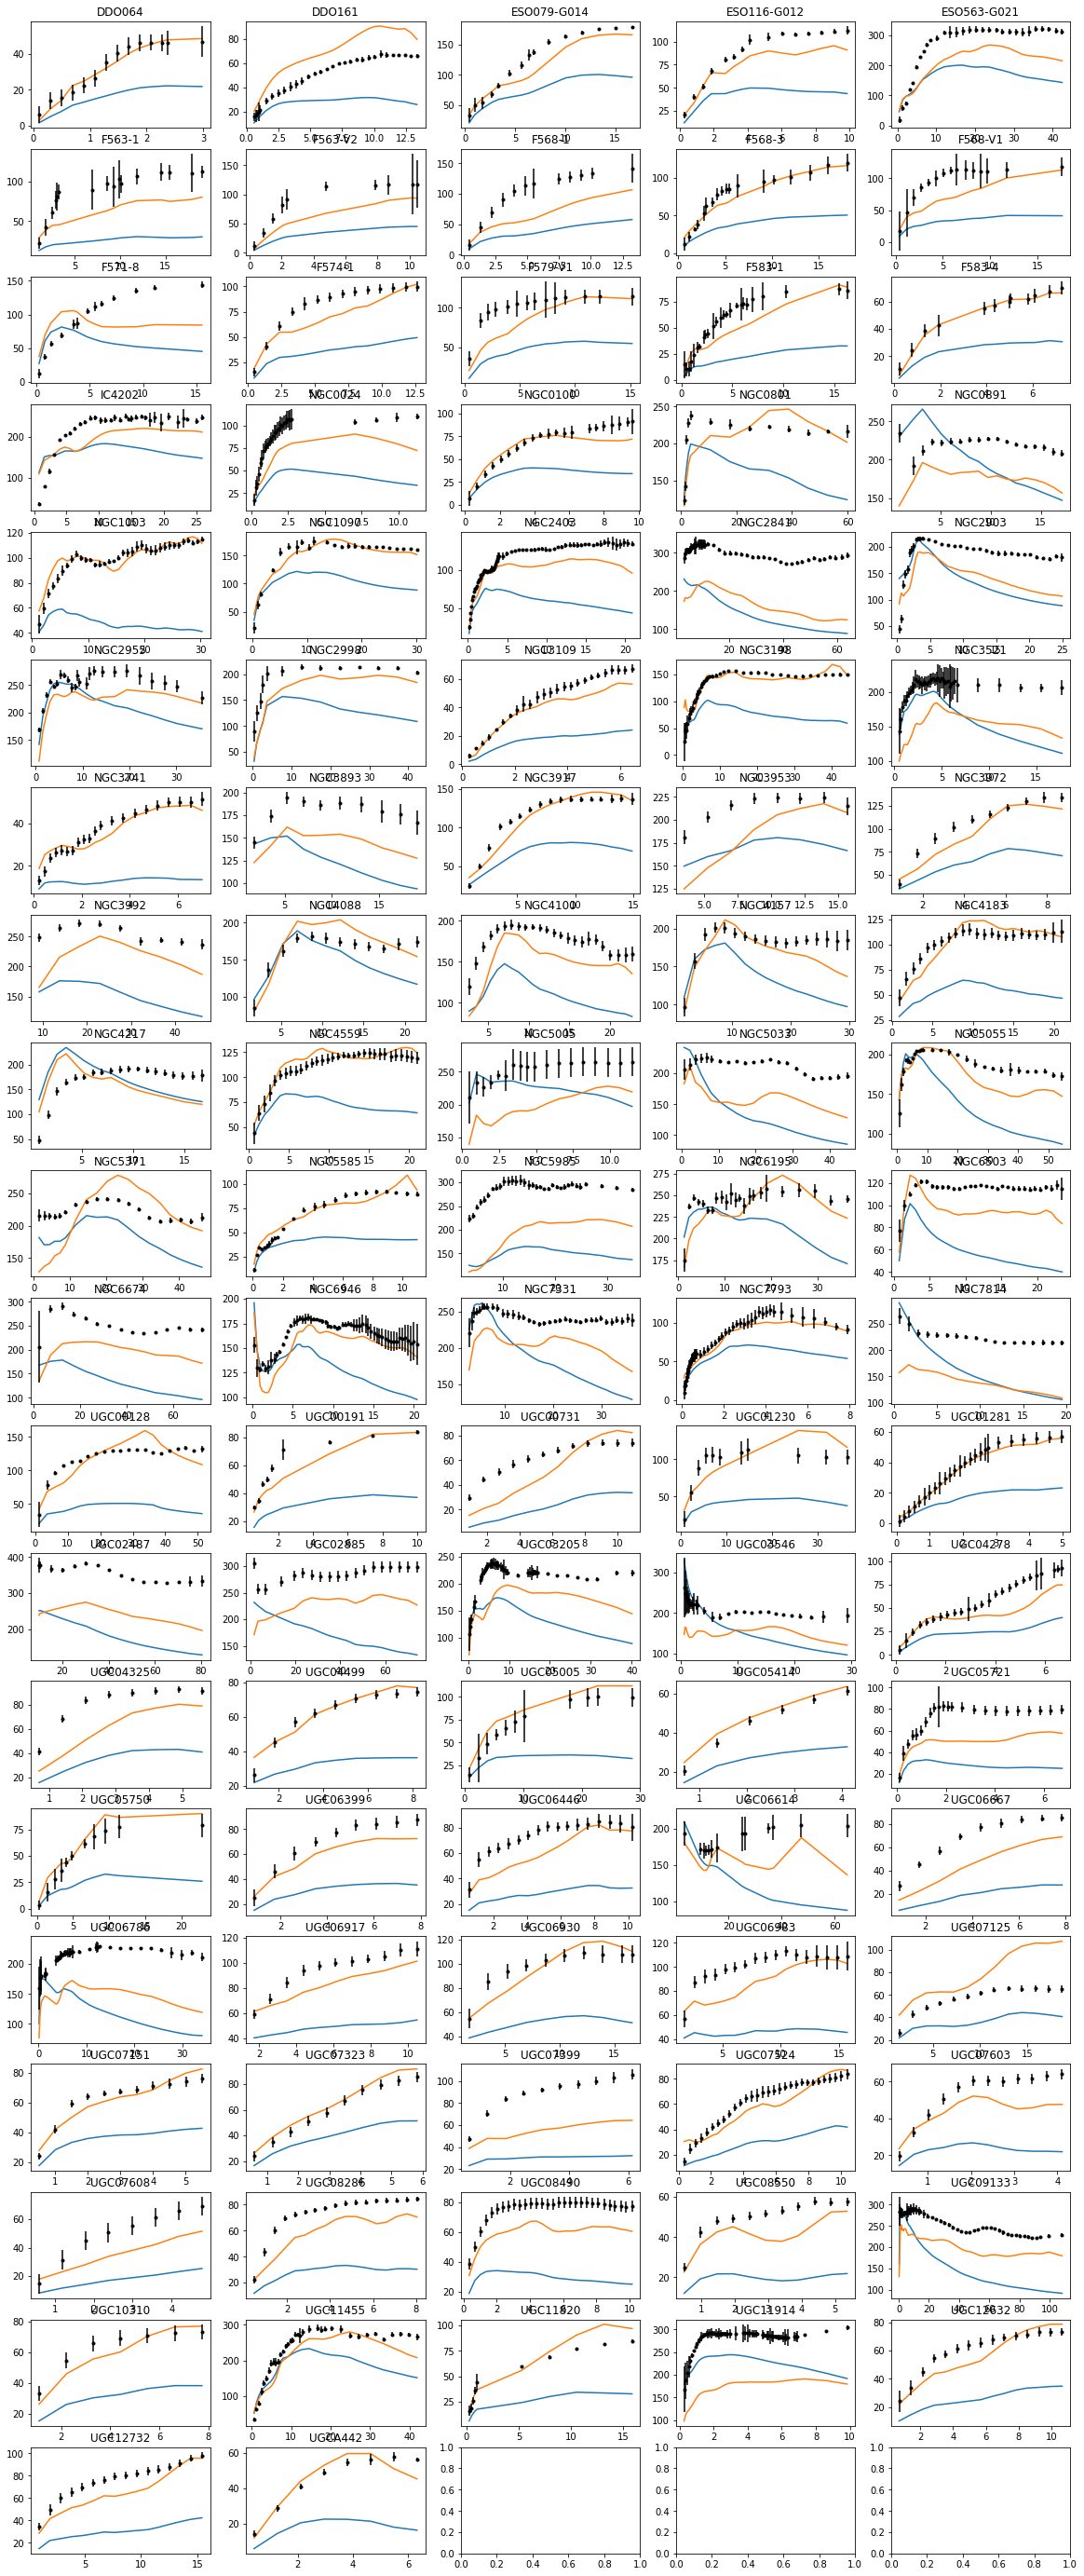

In [92]:
plot_velocities(inputs)